In [27]:
import pickle
import pathlib
import datetime
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import platform
from shutil import copyfile
from sklearn.model_selection import train_test_split

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

def plot_history(df_history, title):
    acc = df_history['train_acc']
    val_acc = df_history['valid_acc']
    
#     loss = history['loss']
#     val_loss = history['val_loss']

    epochs_range = range(len(acc))

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.grid(True)
    ax.plot(epochs_range, acc, label='Training Accuracy')
    ax.plot(epochs_range, val_acc, label='Validation Accuracy')
    ax.legend(loc='lower right')
        
    ax.set_title(title)
    ax.set_ylim((0, 1))
    ax.yaxis.set_ticks(np.linspace(0,1,11))      

    if 'lr' in df_history.columns:
        lr = df_history['lr']
        ax2 = ax.twinx() 
        color = 'tab:red'
        ax2.set_ylabel('learning-rate', color=color)  # we already handled the x-label with ax1
        ax2.plot(epochs_range, lr, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped

#     plt.subplot(1, 2, 2)
#     plt.plot(epochs_range, loss, label='Training Loss')
#     plt.plot(epochs_range, val_loss, label='Validation Loss')
#     plt.legend(loc='upper right')
#     plt.title('Training and Validation Loss')
#     plt.ylim((0,1))
    
  
def plot_file(fname, show=False, subtitle=''):
    print('plot ',fname)
    if fname[-3:]=='pkl':
        f = open(fname, 'rb')
        history = pickle.load(f)
        f.close()    
        df_hist= pd.DataFrame({'train_acc':history['train_acc'], 
                               'valid_acc':history['valid_acc']})
#                                'lr':history['lr']})    
        if 'lr' in history:
            ss = pd.Series(history['lr'])
            df_hist = df_hist.assign(lr=ss)
            
        if 'training_time' in history:
            print('training_time:',history['training_time'])
            
        if 'lr_scheduler' in history:
            print('lr_scheduler', history['lr_scheduler'])  
            
    elif fname[-3:]=='csv':    
        df_hist = pd.read_csv(fname, index_col=0)
    
    print(df_hist.tail())
    print(df_hist.shape)


#     try:
#         print('max_learn_rate:', history['max_learn_rate'])
#         print('end_learn_rate:', history['end_learn_rate'])
#         print('warmup_epoch_count:', history['warmup_epoch'])
#         print('platform:', history['platform'] )        
#         print('train_epoch_time:', history['train_epoch_time'])
#         print('valid_epoch_time:', history['valid_epoch_time'])
#     except Exception as ex:
#         print(ex.__class__.__name__, ex)
#         pass
    if max(df_hist['train_acc']) > 2:
        df_hist['train_acc'] /= 100
        df_hist['valid_acc'] /= 100
    n = len(df_hist['train_acc'])

    if show:
        print('epoch   acc   val_acc   loss    val_loss')
        for i in range(n):
            print('{:3d}   {:.4f}   {:.4f}'.
                  format(i+1, df_hist['train_acc'][i], df_hist['valid_acc'][i]))
    title = fname[:-4]
    if subtitle:
        title = title+'\n'+subtitle
        
    plot_history(df_hist, title)      

plot  hist_twostream_resnet34_adam_0218_0901.pkl
training_time: 0:57:08
lr_scheduler {'step_size': 10, 'gamma': 0.8, 'base_lrs': [0.0005], 'last_epoch': 0, '_step_count': 1, '_get_lr_called_within_step': False, '_last_lr': [0.0005], 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.99)\n    eps: 1e-08\n    initial_lr: 0.0005\n    lr: 0.0005\n    weight_decay: 0\n)'}
    train_acc  valid_acc      lr
25   0.873349   0.836413  0.0005
26   0.875277   0.831409  0.0005
27   0.875759   0.841416  0.0005
28   0.876627   0.825250  0.0005
29   0.881542   0.842571  0.0005
(30, 3)
plot  hist_twostream_resnet50_adam_0218_1034.pkl
training_time: 0:56:51
lr_scheduler {'step_size': 10, 'gamma': 0.8, 'base_lrs': [0.0005], 'last_epoch': 30, '_step_count': 31, '_get_lr_called_within_step': False, '_last_lr': [0.00025600000000000004], 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.99)\n    eps: 1e-08\n    initial_lr: 0.0005\n    lr: 0.000256000

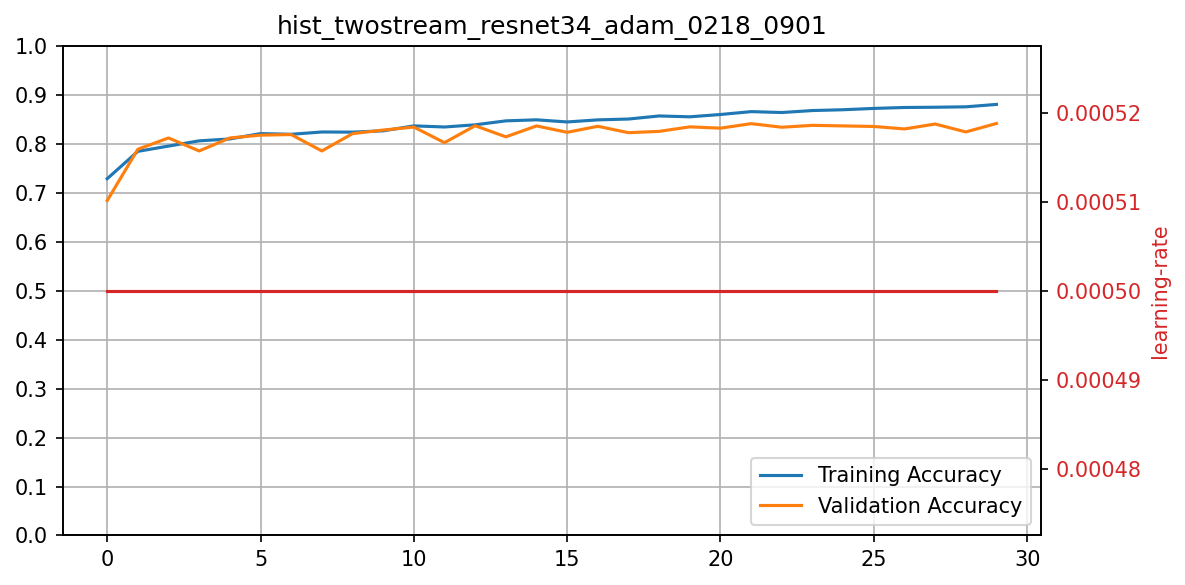

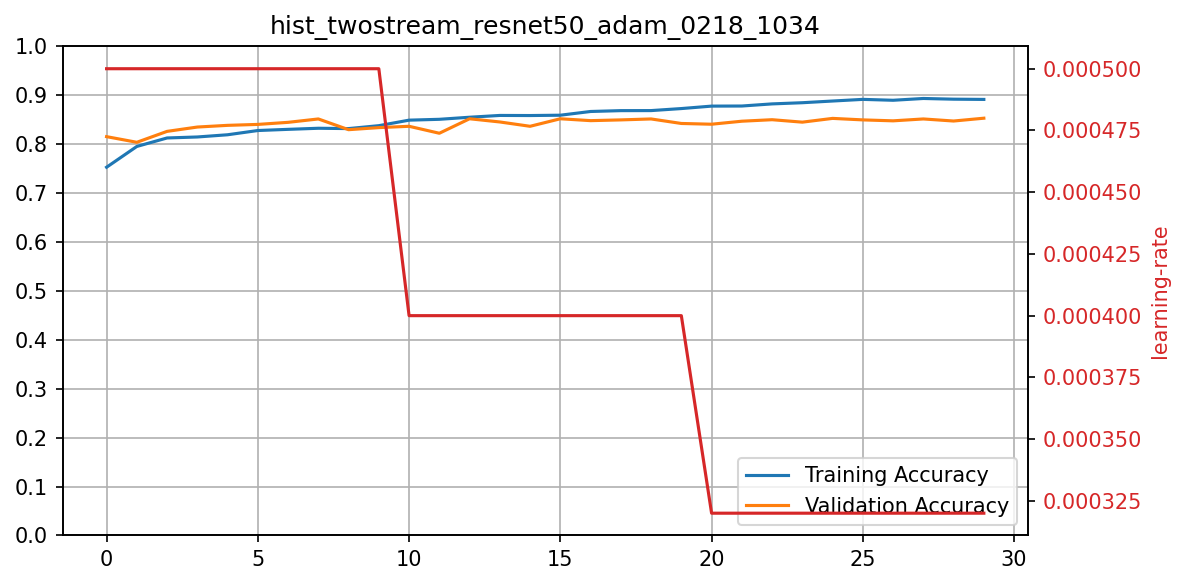

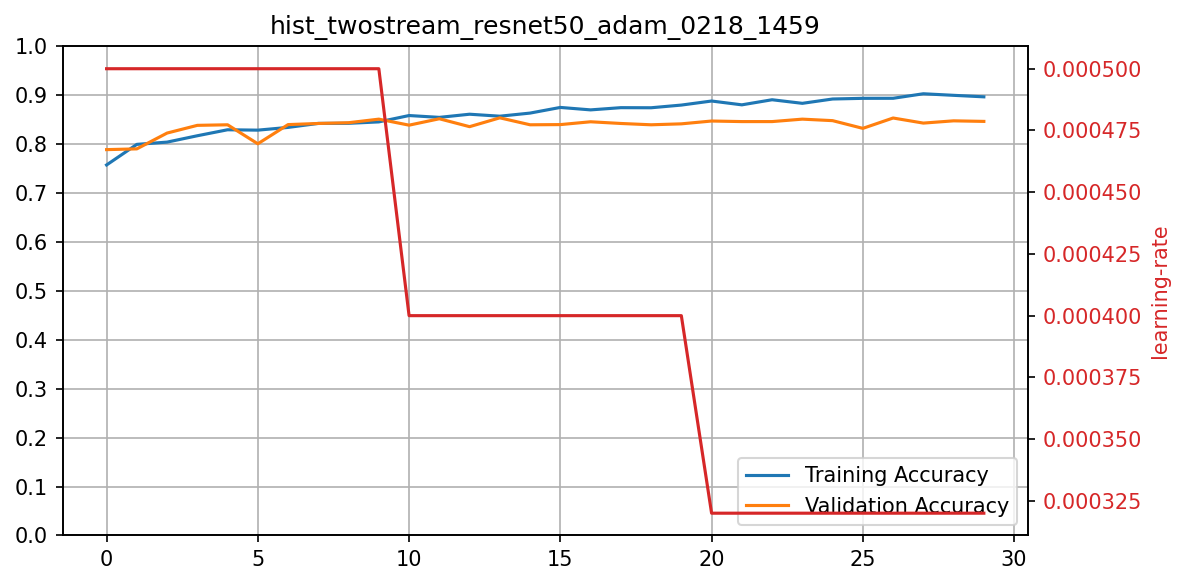

In [42]:
plot_file('hist_twostream_resnet34_adam_0218_0901.pkl', show=False)
plot_file('hist_twostream_resnet50_adam_0218_1034.pkl', show=False)
plot_file('hist_twostream_resnet50_adam_0218_1459.pkl', show=False)



plot  hist_twostream_resnet50_adam_0219_1215.pkl
training_time: 1:07:13
lr_scheduler {'step_size': 10, 'gamma': 0.8, 'base_lrs': [0.0005], 'last_epoch': 30, '_step_count': 31, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.00025600000000000004], 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.99)\n    eps: 1e-08\n    initial_lr: 0.0005\n    lr: 0.00025600000000000004\n    weight_decay: 0\n)'}
    train_acc  valid_acc       lr
25   0.887711   0.839492  0.00032
26   0.892145   0.839877  0.00032
27   0.894361   0.844111  0.00032
28   0.893687   0.847960  0.00032
29   0.890024   0.844111  0.00032
(30, 3)
plot  hist_twostream_resnet50_adam_0219_1336.pkl
training_time: 1:14:15
lr_scheduler {'step_size': 10, 'gamma': 0.8, 'base_lrs': [0.0005], 'last_epoch': 30, '_step_count': 31, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.00025600000000000004], 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    bet

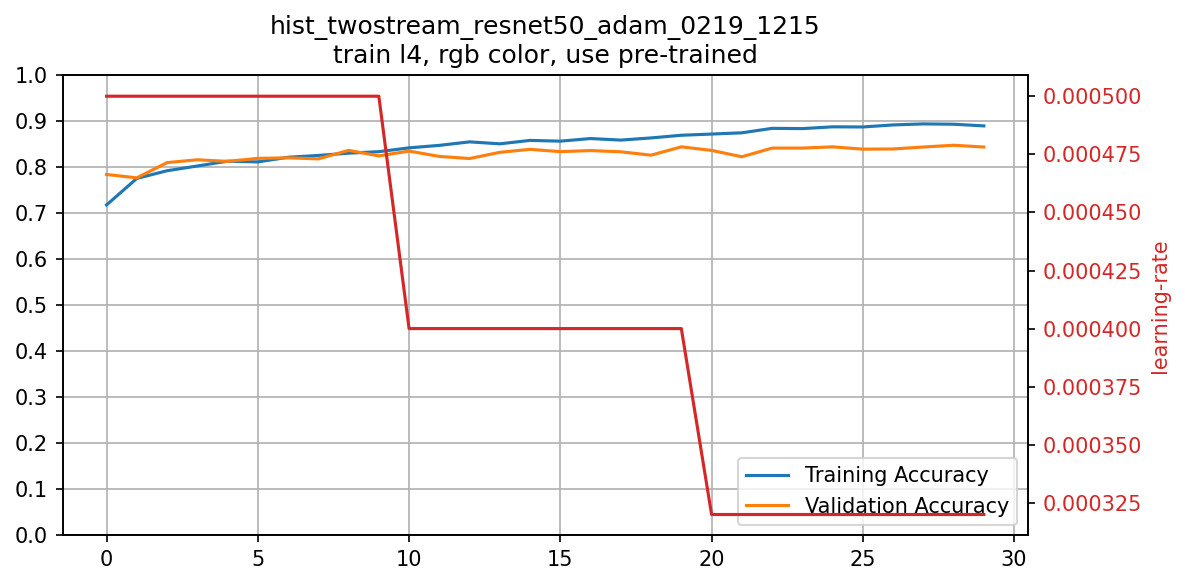

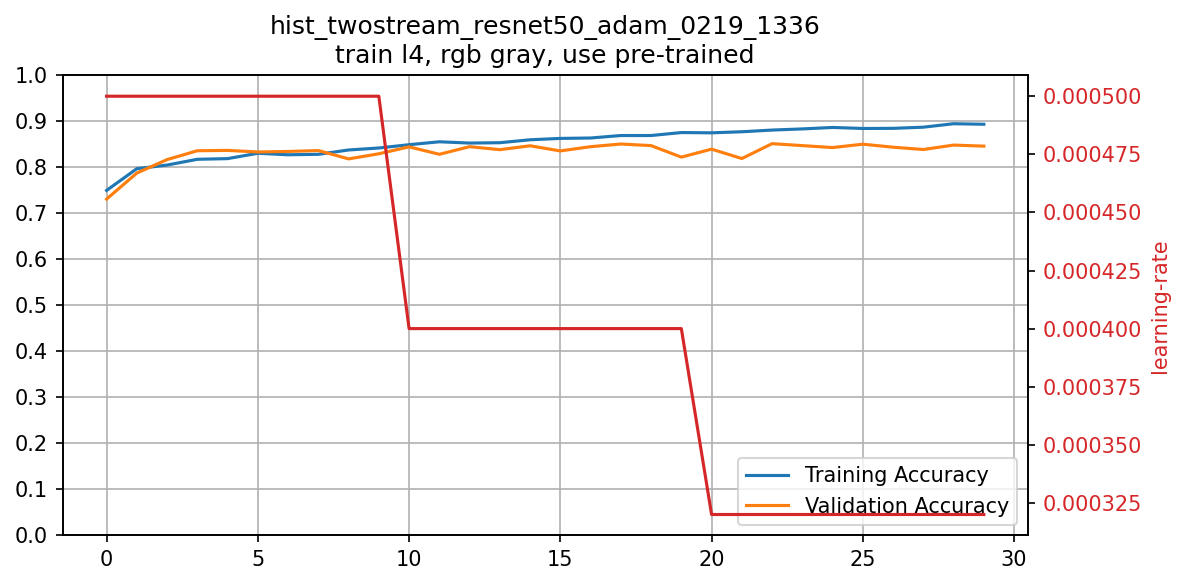

In [48]:
plot_file('hist_twostream_resnet50_adam_0219_1215.pkl', False, 'train l4, rgb color, use pre-trained')
plot_file('hist_twostream_resnet50_adam_0219_1336.pkl', False, 'train l4, rgb gray, use pre-trained')

----------------------------------------------------------------------------------------------------
no random rgb, 2 seg
plot  hist_twostream_resnet50_adam_0219_1910.pkl
training_time: 2:07:02
lr_scheduler {'step_size': 10, 'gamma': 0.8, 'base_lrs': [0.0005], 'last_epoch': 30, '_step_count': 31, '_get_lr_called_within_step': False, '_last_lr': [0.00025600000000000004], 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.99)\n    eps: 1e-08\n    initial_lr: 0.0005\n    lr: 0.00025600000000000004\n    weight_decay: 0\n)'}
    train_acc  valid_acc       lr
25   0.903904   0.852964  0.00032
26   0.912675   0.854118  0.00032
27   0.913253   0.854888  0.00032
28   0.914699   0.851039  0.00032
29   0.914120   0.854503  0.00032
(30, 3)
----------------------------------------------------------------------------------------------------
random rgb, 1 seg
plot  hist_twostream_resnet50_adam_0219_1848.pkl
training_time: 1:20:00
lr_scheduler {'step_size': 10, 'gamma': 0.

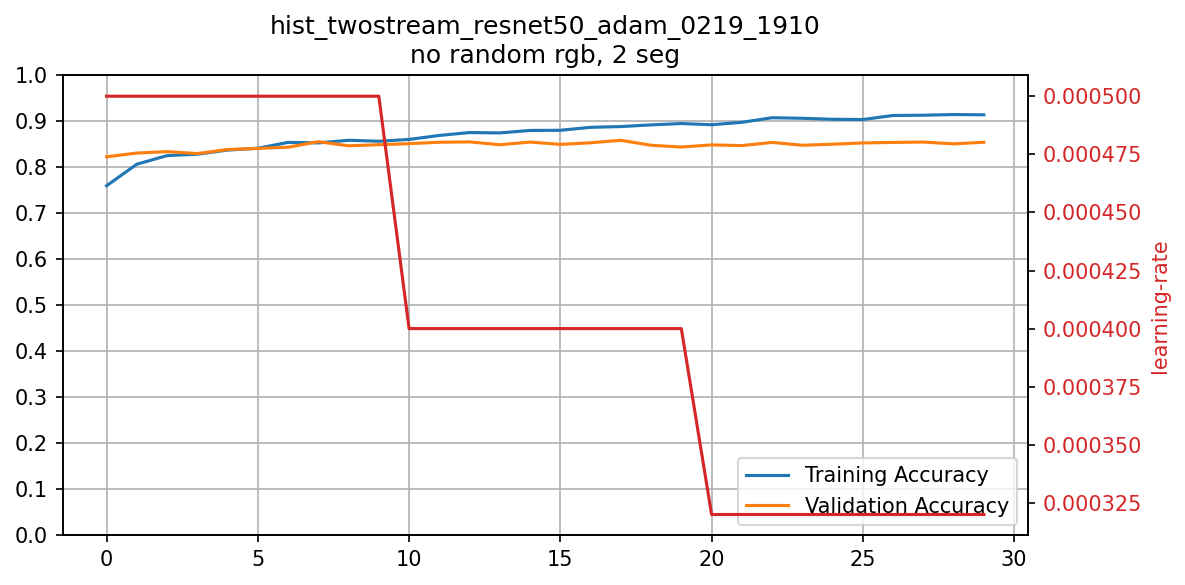

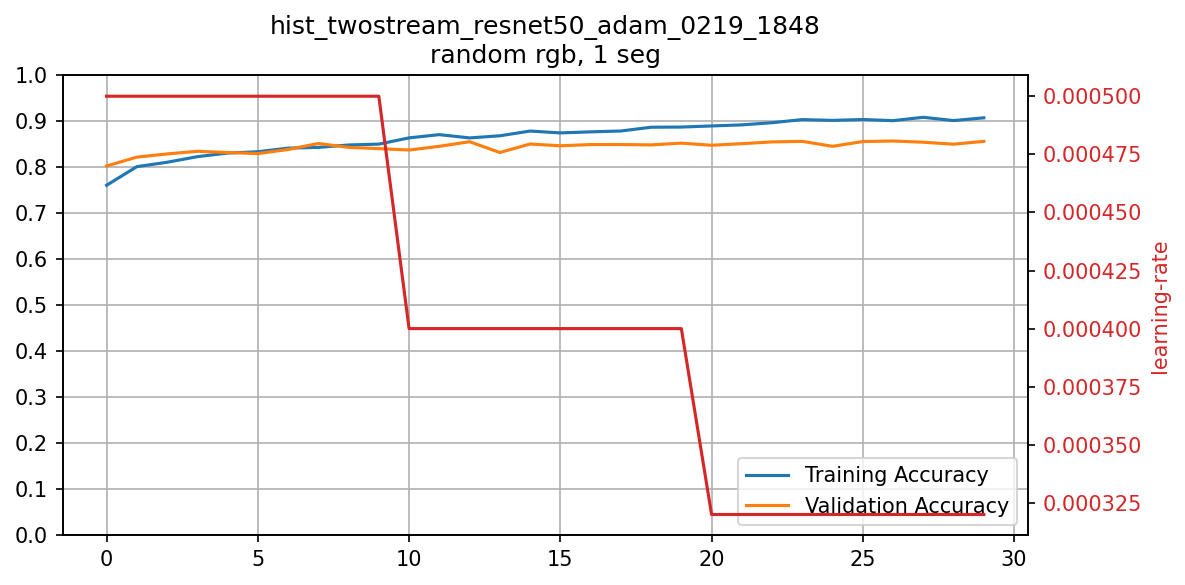

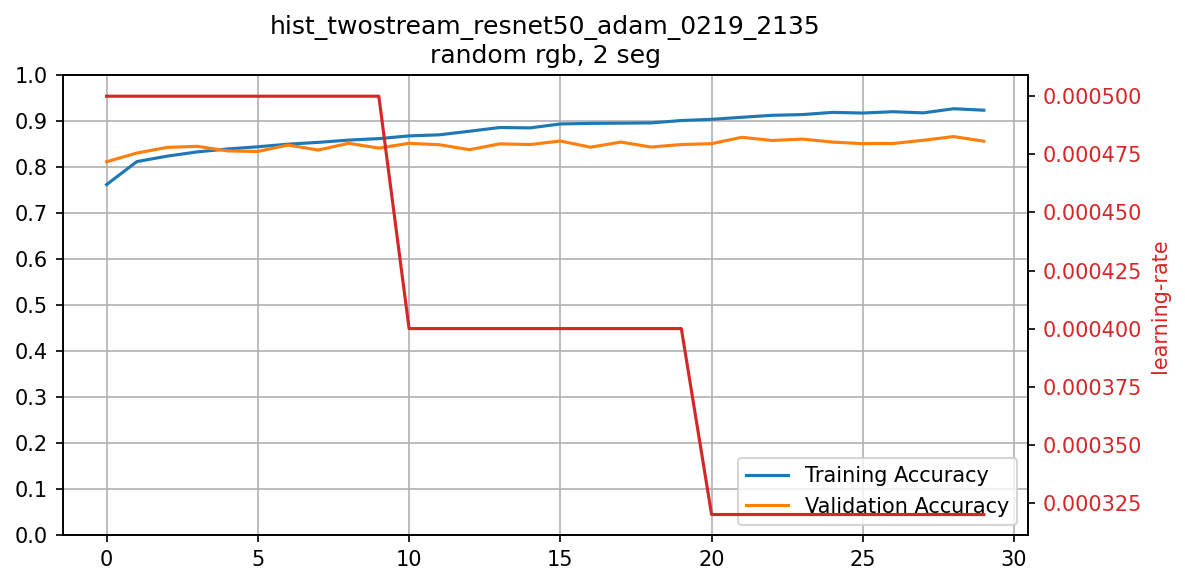

In [47]:
print('-----'*20)
print('no random rgb, 2 seg')
plot_file('hist_twostream_resnet50_adam_0219_1910.pkl', False, 'no random rgb, 2 seg')

print('-----'*20)
print('random rgb, 1 seg')
plot_file('hist_twostream_resnet50_adam_0219_1848.pkl', False, 'random rgb, 1 seg')

print('-----'*20)
print('random rgb, 2 seg')
plot_file('hist_twostream_resnet50_adam_0219_2135.pkl', False, 'random rgb, 2 seg')
print('以CP值來講的話, random rgb, 1 seg就夠了, 2 seg要多花一倍時間, 但val 差不多')

In [41]:
a = random.sample(range(1,11) , 5)
a.sort()
print(a)

[2, 6, 8, 9, 10]
